# Project Overview

- extract financial data like 
    - historical share price
    - quarterly revenue reportings from various sources using Python libraries and webscraping on popular stocks
- collecting this data you will visualize it in a dashboard to identify patterns or trends.    

- The stocks we will work with are Tesla, Amazon, AMD, and GameStop.

In [1]:
!pip install yfinance
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 3.4 MB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.2-py3-none-any.whl

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable


In [9]:
# using the yfinance library to Extract stock data
import yfinance as yf

apple = yf.Ticker("AAPL")


In [15]:
# use attribute info for extract infomation
import json
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
def get_info(url, filename):
    response = requests.get(url)
    if response.status_code== 200:
        with open ("apple.json", "r") as jason_file:
            apple_info =json.load(jason_file)
            return apple_info
    else: 
        print("Download filded")
        return None
    

apple_info = get_info(url,"apple.json")
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [16]:
apple_info["country"]

'United States'

## Extracting share price

In [19]:
apple_share_price_data = apple.history(period="max")
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0


In [20]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

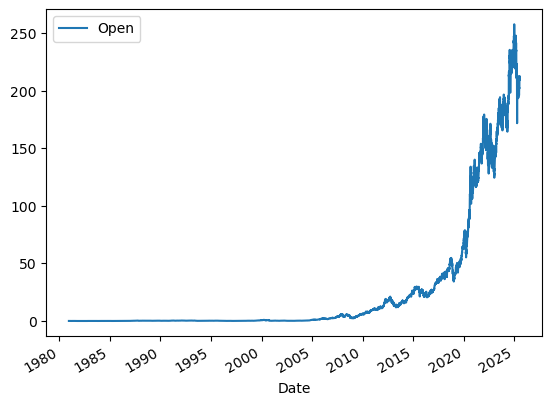

In [21]:
apple_share_price_data.plot(x="Date", y="Open")